<a href="https://colab.research.google.com/github/ChethanaVaisali/COVID_19/blob/master/COVID_19_Densenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DenseNet for COVID 19**

## The contents of this notebook are as follows.


*   [Import dataset and libraries](https://colab.research.google.com/drive/1aL89po9Dsmhx8eFenGz6KKtbv_njOii1#scrollTo=kvn_H39ugHsg)
*   [Model](https://colab.research.google.com/drive/1aL89po9Dsmhx8eFenGz6KKtbv_njOii1#scrollTo=bCDTh-dQgOpD)


*   [Devset data results](https://)

*   [Test data results - Please click this for evaluation on test data](https://colab.research.google.com/drive/1aL89po9Dsmhx8eFenGz6KKtbv_njOii1#scrollTo=aB7znYOq-iXT&line=1&uniqifier=1)


## **Import dataset and libraries**

In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense

In [4]:
import numpy as np

train_x = np.load('/gdrive/My Drive/CV Assignment 2/Augmented_data/train_x_256x256.npy')
train_y = np.load('/gdrive/My Drive/CV Assignment 2/Augmented_data/train_y_256x256.npy')

valid_x = np.load('/gdrive/My Drive/CV Assignment 2/Augmented_data/val_x_256x256.npy')
valid_y = np.load('/gdrive/My Drive/CV Assignment 2/Augmented_data/val_y_256x256.npy')

test_x = np.load('/gdrive/My Drive/CV Assignment 2/Augmented_data/test_x_256x256.npy')
test_y = np.load('/gdrive/My Drive/CV Assignment 2/Augmented_data/test_y_256x256.npy')

print(train_x.shape, train_y.shape)
print(valid_x.shape, valid_y.shape)
print(test_x.shape, test_y.shape)

(4136, 256, 256, 3) (4136,)
(1035, 256, 256, 3) (1035,)
(464, 256, 256, 3) (464,)


In [5]:
## Convert y to one hot encoding

train_y = tf.keras.utils.to_categorical(train_y)
valid_y = tf.keras.utils.to_categorical(valid_y)
test_y = tf.keras.utils.to_categorical(test_y)

print(train_y.size, valid_y.size, test_y.size)

12408 3105 1392


In [0]:
train_x = train_x/255
valid_x  = valid_x/255
test_x = test_x/255

## **DenseNet201 Pretrained Model**

In [7]:
dense_model = tf.keras.applications.DenseNet201(weights='imagenet', input_shape=(256,256,3),include_top=False)

74842112/74836368 [==============================] - 1s 0us/step


In [8]:
dense_model.summary()

Model: "densenet201"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 128, 128, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1/conv[0][0]                 
________________________________________________________________________________________

# Addition of few layers to densenet

In [9]:

# The addition of top layers
x = Flatten()(dense_model.output)
x = Dense(64, activation = 'relu',kernel_regularizer= tf.keras.regularizers.l2(0.01))(x)
x = Dense(3, activation = 'softmax')(x)
model = tf.keras.models.Model(inputs = dense_model.input, outputs = x)

for layer in dense_model.layers:
  layer.trainable = False

for layer in dense_model.layers:
  if"BatchNormalization" in layer.__class__.__name__:
    layer.trainable = True
from tensorflow.keras.optimizers import Adam
opt = Adam(lr = 0.0003, decay = 0.0003/100)
model.compile(optimizer= opt , loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()
  

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 128, 128, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [0]:
mc = tf.keras.callbacks.ModelCheckpoint('/gdrive/My Drive/Colab Notebooks/dense1.h5',monitor='val_loss', save_best_only = True, verbose = 1, mode='min')
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode = 'min',patience = 15, verbose=1)
lr = tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience = 5, min_lr = 0.0000001, verbose = 1)
history = model.fit(train_x, train_y, batch_size = 32, epochs = 100, validation_data=(valid_x,valid_y), shuffle = True, callbacks = [es,lr, mc])

Epoch 1/100
130/130 [==============================] - ETA: 0s - loss: 1.0951 - accuracy: 0.9033
Epoch 00001: val_loss improved from inf to 0.74428, saving model to /gdrive/My Drive/Colab Notebooks/dense1.h5
130/130 [==============================] - 52s 400ms/step - loss: 1.0951 - accuracy: 0.9033 - val_loss: 0.7443 - val_accuracy: 0.8841 - lr: 3.0000e-04
Epoch 2/100
130/130 [==============================] - ETA: 0s - loss: 0.4081 - accuracy: 0.9809
Epoch 00002: val_loss improved from 0.74428 to 0.39447, saving model to /gdrive/My Drive/Colab Notebooks/dense1.h5
130/130 [==============================] - 48s 366ms/step - loss: 0.4081 - accuracy: 0.9809 - val_loss: 0.3945 - val_accuracy: 0.9604 - lr: 3.0000e-04
Epoch 3/100
130/130 [==============================] - ETA: 0s - loss: 0.2684 - accuracy: 0.9932
Epoch 00003: val_loss did not improve from 0.39447
130/130 [==============================] - 43s 329ms/step - loss: 0.2684 - accuracy: 0.9932 - val_loss: 0.4482 - val_accuracy: 0.9

# Accuracy curve

<Figure size 432x288 with 0 Axes>

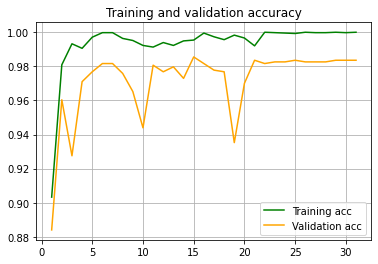

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)
plt.plot(epochs,acc, 'b', color='green', label = 'Training acc')
plt.plot(epochs,val_acc, 'b', color='orange', label = 'Validation acc')

plt.title('Training and validation accuracy')
plt.grid('off')
plt.legend()

plt.figure()

# Loss Curve

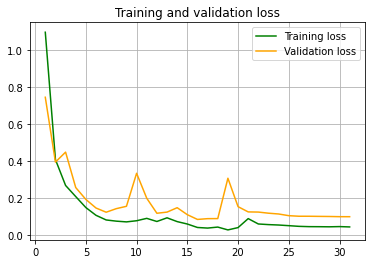

In [0]:
plt.plot(epochs, loss, 'b', color='green', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', color='orange', label = 'Validation loss')
plt.title('Training and validation loss')
plt.grid('off')
plt.legend()
plt.show()

In [0]:
model.load_weights('/gdrive/My Drive/CV Assignment 2/model weights/dense1.h5')

In [0]:
model.evaluate(test_x,test_y)

15/15 [==============================] - 8s 502ms/step - loss: 0.1263 - accuracy: 0.9828


[0.12626156210899353, 0.982758641242981]

In [0]:
pred = model.predict(test_x)

## Confusion Matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


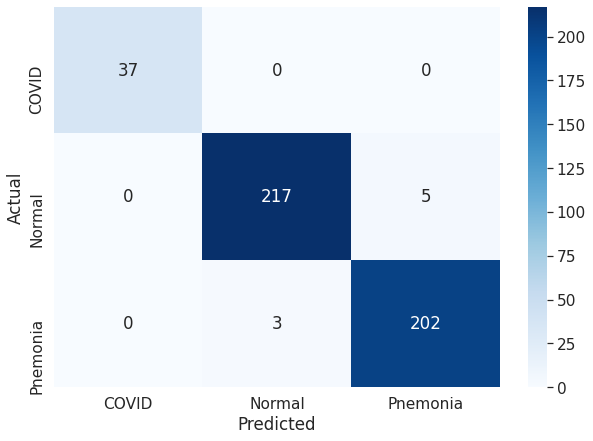

In [13]:
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y = np.argmax(test_y,axis = 1)
pred_y = np.argmax(pred,axis = 1)
data = confusion_matrix(y,pred_y)
df = pd.DataFrame(data, columns = ['COVID','Normal','Pnemonia'], index = ['COVID','Normal','Pnemonia'])
df.index.name = 'Actual'
df.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale = 1.4)
sns.heatmap(df, cmap = 'Blues', annot = True, fmt = "d")

## Classification Report

In [14]:
from sklearn import metrics

print(metrics.classification_report(y,pred_y,labels = [0,1,2],target_names={'COVID' : 0,'Normal' : 1,'Pneumonia' : 2}, digits=4))

              precision    recall  f1-score   support

       COVID     1.0000    1.0000    1.0000        37
      Normal     0.9864    0.9775    0.9819       222
   Pneumonia     0.9758    0.9854    0.9806       205

    accuracy                         0.9828       464
   macro avg     0.9874    0.9876    0.9875       464
weighted avg     0.9828    0.9828    0.9828       464



## A function for Grad-CAM visualization

In [0]:
def get_heatmap(model,img_index, Images, LAYER_NAME, CLASS_INDEX):
  img = Images[img_index]
  img = np.expand_dims(img,0)

  grad_model = tf.keras.models.Model([model.inputs],[model.get_layer(LAYER_NAME).output,model.output])

  with tf.GradientTape() as tape:
    conv_outputs,predictions = grad_model(img)
    loss = predictions[:,CLASS_INDEX]
    tape.watch(conv_outputs)
  
  output = conv_outputs[0]
  grads = tape.gradient(loss,conv_outputs)[0]

  gate_f = tf.cast(output > 0, 'float32')
  gate_r = tf.cast(grads > 0, 'float32')
  guided_grads = tf.cast(output > 0, 'float32') * tf.cast(grads > 0, 'float32') * grads

  guided_grads = guided_grads[0]
  weights = tf.reduce_mean(guided_grads, axis=(0, 1))
  cam = tf.reduce_sum(tf.multiply(weights, output), axis = -1)

  cam = cv2.resize(cam.numpy(), (256, 256))

  cam = cam - np.min(cam)
  heatmap = (cam - cam.min()) / (cam.max() - cam.min() + 1e-5)
  heatmap = (heatmap * 255).astype('uint8')

  return heatmap


## Grad-CAM Visualizations of few patients 

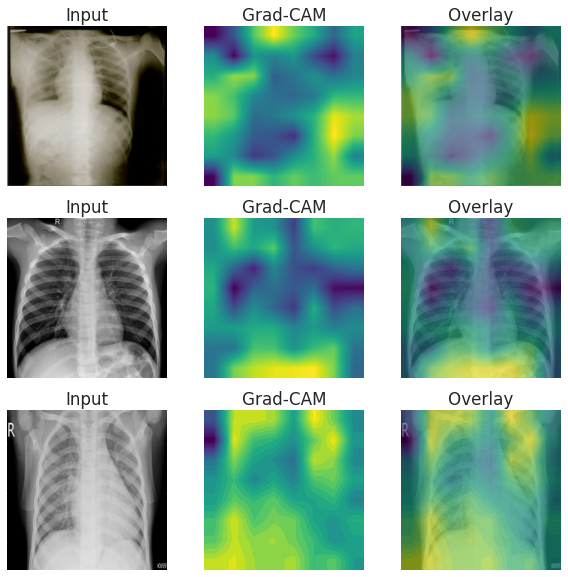

In [16]:
indices = [3, 371, 75]

nrows = len(indices)
ncols = 3
LAYER_NAME = 'conv5_block32_concat'
fig, ax = plt.subplots(nrows = nrows, ncols = ncols, sharex=True, sharey = True, figsize=(10,10))

for i in range(len(indices)):
  ax[i,0].imshow(test_x[indices[i]])
  ax[i,0].axis('off')
  ax[i,0].set_title('Input')

  # ax[i,1].imshow(test_x[indices[i]])
  ax[i,1].imshow(get_heatmap(model,indices[i],test_x,LAYER_NAME,np.argmax(test_y[indices[i]])),cmap = 'viridis')
  ax[i,1].axis('off')
  ax[i,1].set_title('Grad-CAM')

  ax[i,2].imshow(test_x[indices[i]])
  ax[i,2].imshow(get_heatmap(model,indices[i],test_x,LAYER_NAME,np.argmax(test_y[indices[i]])),cmap = 'viridis', alpha = 0.65)
  ax[i,2].axis('off')
  ax[i,2].set_title('Overlay')

## ROC-Curve

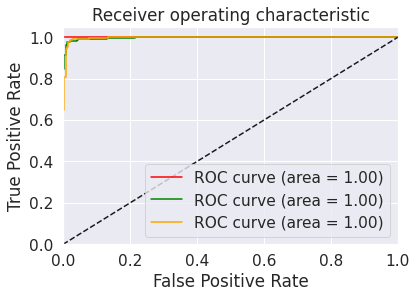

In [17]:
import sklearn
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = sklearn.metrics.roc_curve(test_y[:, i], pred[:, i])
    roc_auc[i] = sklearn.metrics.auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
plt.plot(fpr[0], tpr[0], label='ROC curve (area = %0.2f)' % roc_auc[0], color='red')
plt.plot(fpr[1], tpr[1], label='ROC curve (area = %0.2f)' % roc_auc[1], color='green')
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2], color='orange')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic' )
plt.legend(loc="lower right")
plt.grid('off')
plt.show()

## **Test Results**

### Importing data

In [60]:
# Load new test data
Test_x = np.load('/gdrive/My Drive/CV Assignment 2/Test_Data/testx.npy')
Test_y = np.load('/gdrive/My Drive/CV Assignment 2/Test_Data/testy.npy')
print(Test_x.shape,Test_y.shape)

(587, 512, 512, 3) (587,)


### Preprocessing

In [61]:
# Convert to 256x256 for feeding into the model
import cv2

target_shape = (256, 256)

def _resize_image(image, target):
   return cv2.resize(image, dsize=(target[0], target[1]), interpolation=cv2.INTER_LINEAR)

image = [_resize_image(image=i, target=target_shape) for i in Test_x]
Test_x = np.stack(image, axis=0)
print(Test_x.shape, Test_y.shape)

## Convert y to one hot encoding

Test_y = tf.keras.utils.to_categorical(Test_y)

# print(Test_y.size)

Test_x = Test_x/255

(587, 256, 256, 3) (587,)


### Evaluation

In [62]:
model.evaluate(Test_x,Test_y)

19/19 [==============================] - 2s 109ms/step - loss: 0.1295 - accuracy: 0.9676


[0.12950919568538666, 0.9676320552825928]

In [0]:
pred = model.predict(Test_x)

In [64]:
from sklearn import metrics

print(metrics.classification_report(y,pred_y,labels = [0,1,2],target_names={'COVID' : 0,'Normal' : 1,'Pneumonia' : 2}, digits=4))


              precision    recall  f1-score   support

       COVID     1.0000    0.9796    0.9897        49
      Normal     0.9631    0.9703    0.9667       269
   Pneumonia     0.9664    0.9628    0.9646       269

    accuracy                         0.9676       587
   macro avg     0.9765    0.9709    0.9737       587
weighted avg     0.9677    0.9676    0.9676       587



### Confusion Matrix

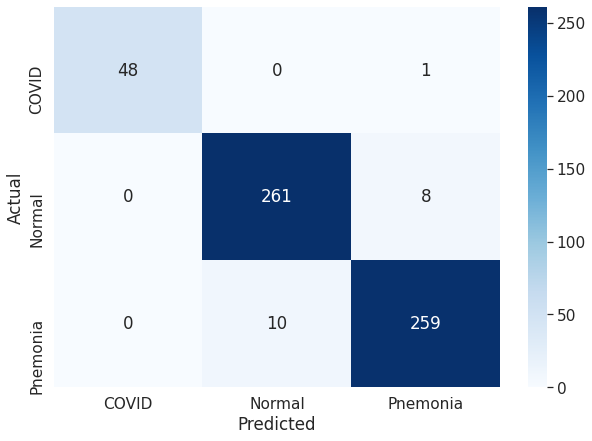

In [65]:
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y = np.argmax(Test_y,axis = 1)
pred_y = np.argmax(pred,axis = 1)
data = confusion_matrix(y,pred_y)
df = pd.DataFrame(data, columns = ['COVID','Normal','Pnemonia'], index = ['COVID','Normal','Pnemonia'])
df.index.name = 'Actual'
df.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale = 1.4)
sns.heatmap(df, cmap = 'Blues', annot = True, fmt = "d")

In [0]:
# A function to get sensitivity and specificity
def find_sensitivity_specificity(data):
  tn_covid = data[1][1] + data[1][2] + data[2][1] + data[2][2]
  fp_covid = data[1][0] + data[2][0]
  tp_covid = data[0][0]
  fn_covid = data[0][1] + data[0][2]
  # print(tn_covid, fp_covid, tp_covid, fn_covid)

  specificity_covid = tn_covid / (tn_covid + fp_covid)
  sensitivity_covid = tp_covid/(tp_covid + fn_covid)

  tn_normal = data[0][0] + data[0][2] + data[2][0] + data[2][2]
  fp_normal = data[0][1] + data[2][1]
  tp_normal = data[1][1]
  fn_normal = data[1][0] + data[1][2]
  # print(tn_normal,fp_normal, tp_normal, fn_normal)

  specificity_normal = tn_normal/(tn_normal + fp_normal)
  sensitivity_normal = tp_normal/(tp_normal + fn_normal)  

  tn_pneumonia = data[0][0] + data[0][1] + data[1][0] + data[1][1]
  fp_pneumonia = data[0][2] + data[1][2]
  tp_pneumonia = data[2][2]
  fn_pneumonia = data[2][0] + data[2][1]
  # print(tn_pneumonia, fp_pneumonia, tp_pneumonia, fn_pneumonia)

  specificity_pneumonia = tn_pneumonia/(tn_pneumonia + fp_pneumonia)
  sensitivity_pneumonia = tp_pneumonia/(tp_pneumonia + fn_pneumonia)

  ## Calculate weighted average of specificity and sensitivity

  sum = np.sum(data, axis = 1)
  samples = np.sum(data)
  weight_covid =sum[0]/samples
  weight_normal = sum[1]/samples
  weight_pneumonia = sum[2]/samples

  specificity = weight_covid * specificity_covid + weight_normal * specificity_normal + weight_pneumonia * specificity_pneumonia
  sensitivity = weight_covid * sensitivity_covid + weight_normal * sensitivity_normal + weight_pneumonia * sensitivity_pneumonia

  return specificity, sensitivity


### Metrics : Precision, Recall, F1 Score, Accuracy, Sensitivity and Specificity

In [71]:
### Printing all the metrics

data = confusion_matrix(y,pred_y)
sensitivity, specificity = find_sensitivity_specificity(data)
report = metrics.classification_report(y,pred_y,labels = [0,1,2],target_names={'COVID' : 0,'Normal' : 1,'Pneumonia' : 2}, digits=4, output_dict = True)

print('Precision : ' + str(report['weighted avg']['precision']))
print('Recall : ' + str(report['weighted avg']['recall']))
print('F1 Score : ' + str(report['weighted avg']['f1-score']))
print('Accuracy : ' + str(report['accuracy']))
print('Sensitivity : ' + str(sensitivity))
print('Specificity : '+ str(specificity))

Precision : 0.9677005428423426
Recall : 0.9676320272572402
F1 Score : 0.9676498940697195
Accuracy : 0.9676320272572402
Sensitivity : 0.9726195450698039
Specificity : 0.9676320272572402


## Observations About Grad-CAM Results
As we can see from the figures of Grad-CAM in the figure below, the activations are mostly concentrated around throat area and just below the lungs area.

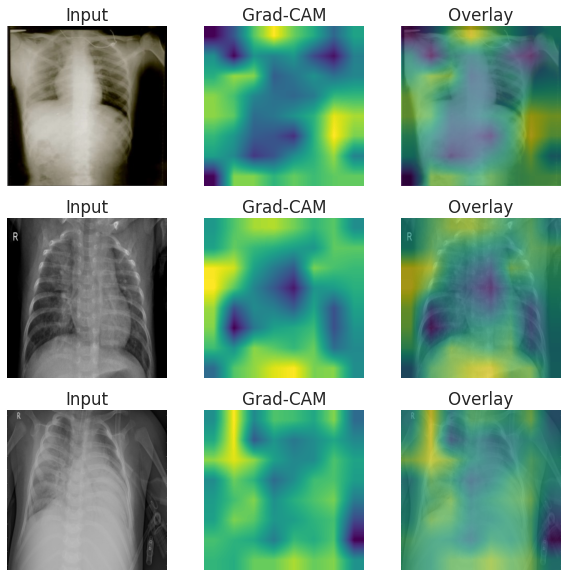

In [72]:
indices = [3, 60, 400]

nrows = len(indices)
ncols = 3
LAYER_NAME = 'conv5_block32_concat'
fig, ax = plt.subplots(nrows = nrows, ncols = ncols, sharex=True, sharey = True, figsize=(10,10))

for i in range(len(indices)):
  ax[i,0].imshow(test_x[indices[i]])
  ax[i,0].axis('off')
  ax[i,0].set_title('Input')

  # ax[i,1].imshow(test_x[indices[i]])
  ax[i,1].imshow(get_heatmap(model,indices[i],test_x,LAYER_NAME,np.argmax(test_y[indices[i]])),cmap = 'viridis')
  ax[i,1].axis('off')
  ax[i,1].set_title('Grad-CAM')

  ax[i,2].imshow(test_x[indices[i]])
  ax[i,2].imshow(get_heatmap(model,indices[i],test_x,LAYER_NAME,np.argmax(test_y[indices[i]])),cmap = 'viridis', alpha = 0.65)
  ax[i,2].axis('off')
  ax[i,2].set_title('Overlay')



---
THE END
---